Aditya Tushar Wadnerkar - 014428557

MNIST classifier using numpy, python and plain Neural Network

Tasks:

- Implementing Mini-Batch Gradient Descent with appropriate learning rate
- Apply and find drop-out rate at each layer
- Initialize Random Weights
- Use Image Augmentation to achieve robustness and avoid overfitting
- Try using multiple layers(more than 2) and experiment with number of layers and neurons
- Use appropriate activation function such as RelU and Softmax
- Scale/Normalize the input
- Use different Learning rates/adaptive learning rate
- The code should provide appropriate metrics, visualization,  testing and training accuracy etc and plot the results and confusion matrix  (this is important)
- Display top common errors in NN learning

In [0]:
# Load Important Libraries
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
from scipy.special import expit as activation_function  # 1/(1+exp(-x)), sigmoid
from scipy.stats import truncnorm
from tqdm import tqdm
np.random.seed(10)
# Activation Function
def relu(x):
  '''
    if input is greater or equal than 0 it will return input and if input is less than 0 it will return 0
  '''
  return (x>=0) * x


Load MNIST Data and Display Plot

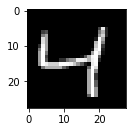

In [5]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

Print Data

In [0]:
plt.show()
print(X_train[0].shape)

(28, 28)
